In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Funções Implementadas

In [25]:
def solve_Lower_triang_matrix(A, B):
    n = len(A)
    X = np.zeros((n, 1), dtype=float)

    for i in range(n):
        dot_product = 0.0
        for j in range(i):
            dot_product += A[i, j] * X[j]
        X[i] = (B[i] - dot_product) / A[i, i]

    return X

In [26]:
def solve_Upper_triang_matrix(A, B):
    n = len(A)
    X = np.zeros((n, 1), dtype=float)

    for i in range(n - 1, -1, -1):
        dot_product = 0.0
        for j in range(i + 1, n):
            dot_product += A[i, j] * X[j]
        X[i] = (B[i] - dot_product) / A[i, i]

    return X

In [27]:
def LU_decomposition(A):
    n = A.shape[0]
    U, L = A.copy(), np.eye(n)

    for i in range(n):
        for j in range(i+1, n):
            coef = -U[j, i] / U[i, i]
            L[j, i] = -coef
            U[j] += U[i] * coef

    return L, U

In [28]:
def LU_solution(A, B):
    L, U = LU_decomposition(A)

    Y = solve_Lower_triang_matrix(L,B)
    X = solve_Upper_triang_matrix(U,Y)

    return X

In [33]:
def gera_estimativa(coef, x):
    sum = 0

    for i in range(0, len(coef)):
        sum += coef[i]*(x**i)

    return sum

In [103]:
def divided_differences(x, fx):
    n = len(fx)
    table = np.zeros((n, n))
    table[:, 0] = fx

    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x[i + j] - x[i])

    return table

In [116]:
def newton_interpolation(x0, xroots, divided_differences):
    n = len(xroots)
    result = 0

    for i in range(n):
        term = divided_differences[i]
        for j in range(i):
            term *= (x0 - xroots[j])
        result += term

    return result

In [122]:
def lagrange_interpolation(x0, xroots, yroots):
    n = len(xroots)
    result = 0

    for k in range(n):
        prod = 1

        for j in range(n):
            if j != k:
                prod *= (x0 - xroots[j]) / (xroots[k] - xroots[j])

        result += yroots[k] * prod

    return result

# 1 – Desenvolva um algoritmo para encontrar o polinômio interpolador do conjunto de pontos {(𝟎, 𝟏), (𝟏, 𝟔), (𝟐, 𝟓), (𝟑, −𝟖)}, utilizando o processo de solução de sistemas de equações. Plote o gráfico obtido !


In [50]:
xi = np.array([0, 1, 2, 3])
fxi = np.array([1, 6, 5, -8])

n = len(xi)

In [51]:
A = np.ones([n, n], dtype='float')
print(A)

#Matriz de Vandermond
for i in range(0, n):
    for j in range(0, n):
        A[i, j] = xi[i]**(j)

print(A)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


In [52]:
B = np.ones([n, 1], dtype='float')

for i in range(0, n):
    B[i] = fxi[i]

print(B)

[[ 1.]
 [ 6.]
 [ 5.]
 [-8.]]


In [53]:
sol = LU_solution(A, B)

print(sol)

[[ 1.]
 [ 6.]
 [ 0.]
 [-1.]]


[]

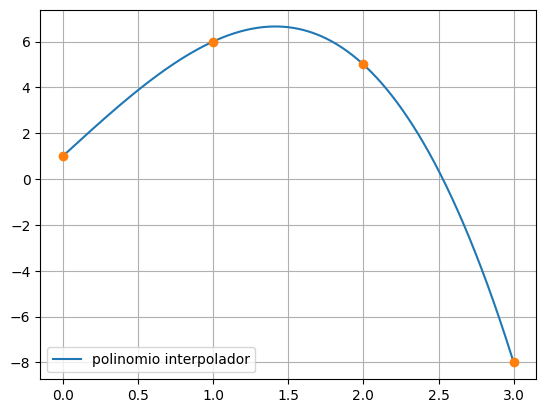

In [54]:
xx = np.linspace(min(xi), max(xi), 1001)
yy = []

for xxi in xx:
    yy.append(gera_estimativa(x, xxi))

plt.plot(xx, yy, label='polinomio interpolador')
plt.plot(xi, fxi, 'o')

plt.legend()
plt.grid()
plt.plot()


# 2 – Desenvolva um algoritmo que use o método de diferenças divididas para encontrar o polinômio que passe pelos pontos (−𝟏, 𝟑), (𝟎, 𝟏), (𝟏, 𝟑), (𝟑, 𝟒𝟑). Compare os resultados com o obtido de forma teórica:

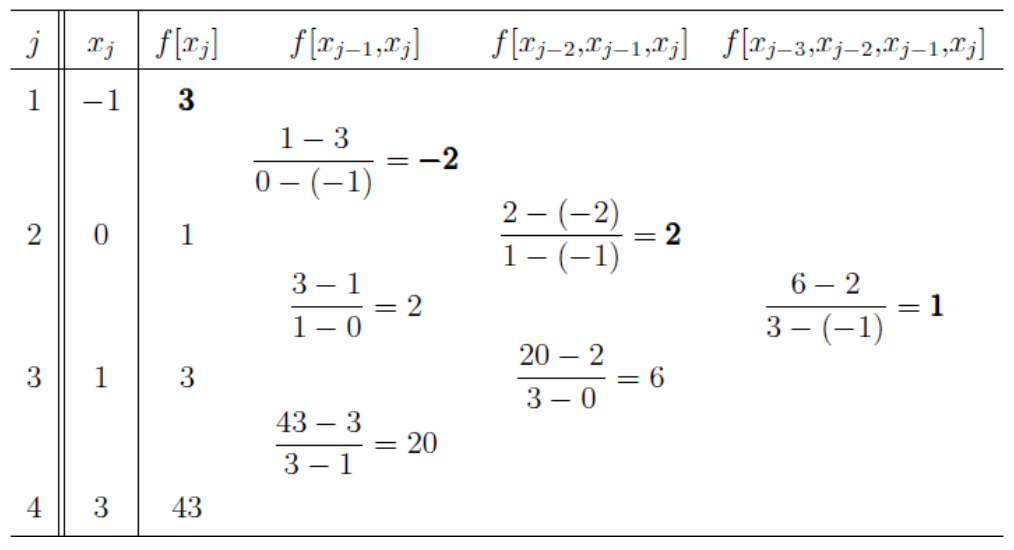

In [110]:
xi = np.array([-1, 0, 1, 3], dtype='float')
yi = np.array([3, 1, 3, 43], dtype='float')

n = len(xi)

In [111]:
Matriz_Newton = np.hstack((xi.reshape(-1, 1), divided_differences(xi, yi)))
print(Matriz_Newton)

[[-1.  3. -2.  2.  1.]
 [ 0.  1.  2.  6.  0.]
 [ 1.  3. 20.  0.  0.]
 [ 3. 43.  0.  0.  0.]]


[]

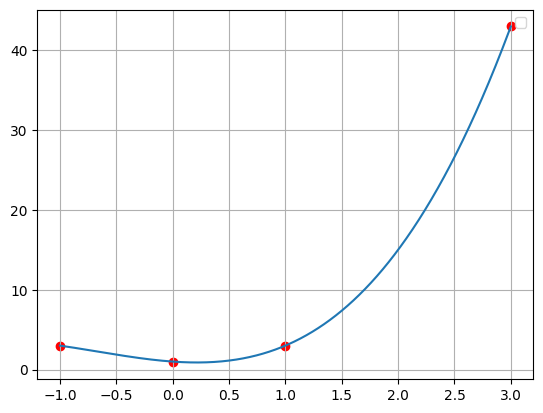

In [121]:
xx = np.linspace(min(xi), max(xi), 1001)

plt.plot(xx, newton_interpolation(xx, xi, divided_differences(xi, yi)[0])) #[3. -2.  2.  1.]
plt.scatter(xi, yi, c='r')

plt.legend()
plt.grid()
plt.plot()

# 3 – Encontre o polinômio da forma $𝒑(𝒙) = 𝒂_{0} + 𝒂_{1}𝒙 + 𝒂_{2}𝒙^𝟐 + 𝒂_{3}𝒙^3$ que passa pelos pontos (𝟎, 𝟎), (𝟏, 𝟏), (𝟐, 𝟒), (𝟑, 𝟗), utilizando o método de Lagrange. Apresente a expressão de cada polinômio de Lagrange.

In [123]:
xi  = np.array([0, 1, 2, 3], dtype='float')
yi = np.array([0, 1, 4, 9], dtype='float')

[]

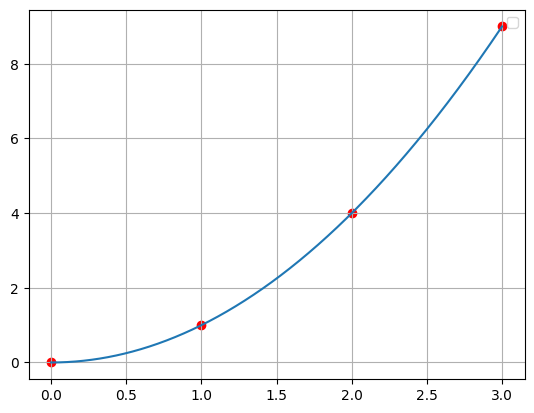

In [124]:
xx = np.linspace(min(xi), max(xi), 1001)

plt.plot(xx, lagrange_interpolation(xx, xi, yi))
plt.scatter(xi, yi, c='r')

plt.legend()
plt.grid()
plt.plot()

# 4 – Construa uma função linear por partes que interpola os pontos (𝟎, 𝟎), (𝟏, 𝟒), (𝟐, 𝟑), (𝟑, 𝟎), (𝟒, 𝟐), (𝟓, 𝟎), utilizando:



##(a) Spline linear;


##(b) Spline quadrática;


##(c) Spline cúbica.


# 5 – Você mediu a queda de voltagem através de um resistor para diversos valores diferentes da corrente i. Os resultados são:

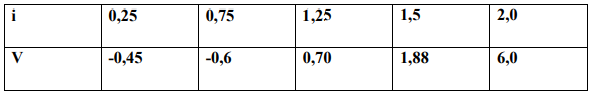

#Use interpolação polinomial de primeiro a quarto grau para fazer uma estimativa da queda de voltagem para i = 1,15. Interprete seus resultados.
